***
# EDA Weather
***

In [106]:
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from warnings import filterwarnings
pd.options.display.max_columns = 500

In [107]:
import seaborn as sns
import missingno as msgo
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [108]:
df = pd.read_csv("../Dataset/weather.csv")

In [109]:
df.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


## Descriptivos

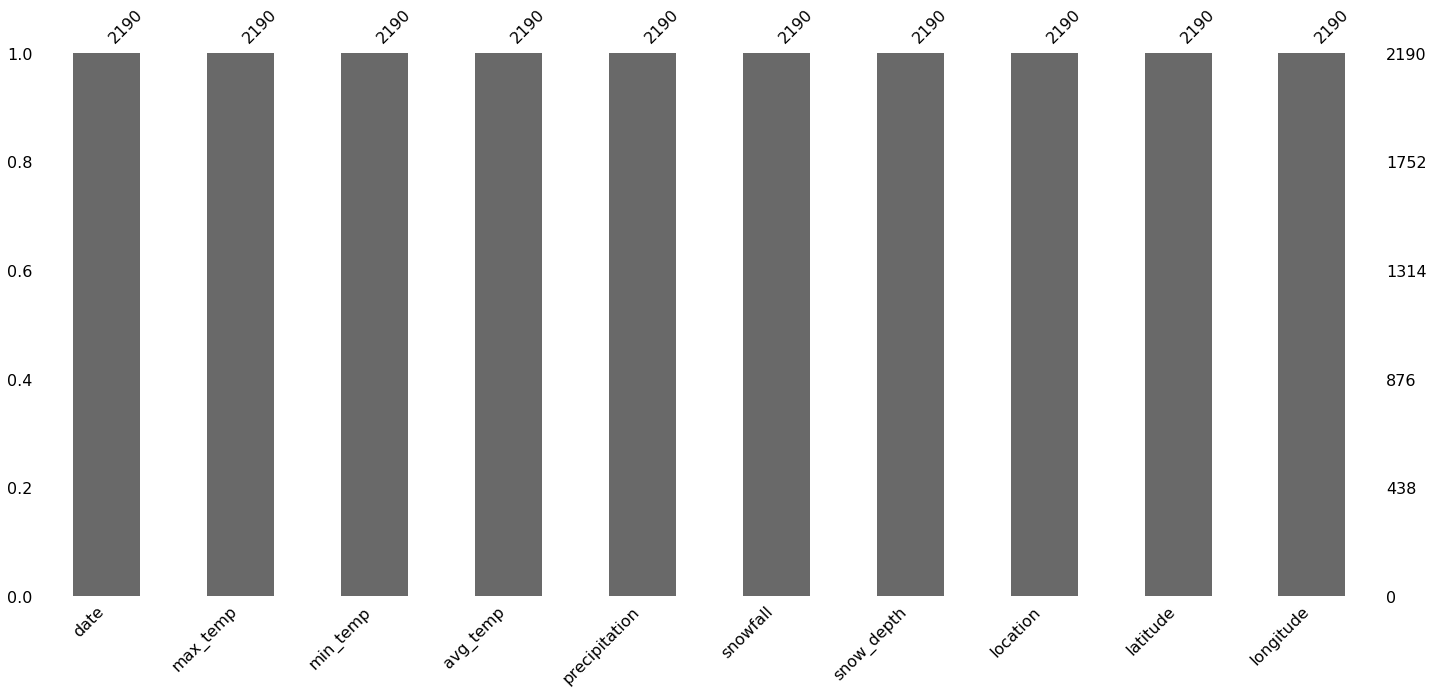

In [110]:
msgo.bar(df)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 10 columns):
date             2190 non-null object
max_temp         2190 non-null int64
min_temp         2190 non-null int64
avg_temp         2190 non-null float64
precipitation    2190 non-null object
snowfall         2190 non-null object
snow_depth       2190 non-null object
location         2190 non-null object
latitude         2190 non-null float64
longitude        2190 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 171.2+ KB


In [112]:
df["precipitation_clean"] = [float(x) if x !=" " else np.nan for x in df.precipitation]
df["snowfall_clean"] = [float(x) if x !=" " else np.nan for x in df.snowfall]
df["snow_depth_clean"] = [float(x) if x !=" " else np.nan for x in df.snow_depth]
df["Delta_temp"] = df["max_temp"]-df["min_temp"]

In [113]:
df["Lluvia"] =[0 if pd.isna(x) else 0 if x == 0 else 1 for x in df.precipitation_clean]
df["Nieve"] =[0 if pd.isna(x) else 0 if x == 0 else 1 for x in df.snowfall_clean]

In [114]:
df["date_año"]= [int(x.split("/")[2]) for x in df["date"]]
df["date_mes"]= [int(x.split("/")[0]) for x in df["date"]]
df["date_dia"]= [int(x.split("/")[1]) for x in df["date"]]

In [115]:
df

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,precipitation_clean,snowfall_clean,snow_depth_clean,Delta_temp,Lluvia,Nieve,date_año,date_mes,date_dia
0,1/1/14,34,24,29.0,0,0,0,JFK,40.647490,-73.779982,0.00,0.0,0.0,10,0,0,14,1,1
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.647490,-73.779982,0.13,2.4,0.0,14,1,1,14,1,2
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.647490,-73.779982,0.22,5.5,7.0,10,1,1,14,1,3
3,1/4/14,31,3,17.0,0,0,7,JFK,40.647490,-73.779982,0.00,0.0,7.0,28,0,0,14,1,4
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.647490,-73.779982,0.10,NaN,6.0,26,1,0,14,1,5
5,1/6/14,53,20,36.5,0.41,,1,JFK,40.647490,-73.779982,0.41,NaN,1.0,33,1,0,14,1,6
6,1/7/14,20,6,13.0,0,0,0,JFK,40.647490,-73.779982,0.00,0.0,0.0,14,0,0,14,1,7
7,1/8/14,24,10,17.0,0,0,0,JFK,40.647490,-73.779982,0.00,0.0,0.0,14,0,0,14,1,8
8,1/9/14,34,22,28.0,0,0,0,JFK,40.647490,-73.779982,0.00,0.0,0.0,12,0,0,14,1,9
9,1/10/14,38,24,31.0,0.19,0.1,0,JFK,40.647490,-73.779982,0.19,0.1,0.0,14,1,1,14,1,10


In [116]:
df["date"]= [datetime.datetime(x+2000,y,z) for x,y,z in zip(df["date_año"],df["date_mes"],df["date_dia"])]

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,2190.0,62.706849,18.940456,17.000000,47.000000,65.000000,80.000000,97.000000
min_temp,2190.0,48.228311,18.057897,2.000000,35.000000,51.000000,64.000000,83.000000
avg_temp,2190.0,55.467580,18.343926,10.500000,41.000000,58.000000,72.000000,89.000000
latitude,2190.0,40.731850,0.059712,40.647490,40.647490,40.771133,40.776927,40.776927
longitude,2190.0,-73.876045,0.079316,-73.974187,-73.974187,-73.873966,-73.779982,-73.779982
precipitation_clean,1953.0,0.138930,0.385733,0.000000,0.000000,0.000000,0.060000,5.260000
snowfall_clean,2099.0,0.133635,0.801216,0.000000,0.000000,0.000000,0.000000,11.000000
snow_depth_clean,2166.0,0.760849,2.453458,0.000000,0.000000,0.000000,0.000000,19.000000
Delta_temp,2190.0,14.478539,4.864002,2.000000,11.000000,14.000000,18.000000,36.000000
Lluvia,2190.0,0.317808,0.465731,0.000000,0.000000,0.000000,1.000000,1.000000


Las columnas precipitation,snowfall y snow_depth son columnas que presentan datos "corruptos" y deben ser limpiados

### Population ages

In [118]:
# distribución de datos

#Agrupación por barrio - Promedio, máximo, mínimo

Promedio

- Al considerar los datos por "barrio" se puede observar 3 grupos grupos de poblaciones promedio - Brooklyn/Manhattan, Bronx/Queens y Staten Island.

In [119]:
df.groupby("location").agg("mean").T

location,Central Park,JFK,LGA
max_temp,62.987671,62.502740,62.630137
min_temp,48.349315,47.680822,48.654795
avg_temp,55.668493,55.091781,55.642466
latitude,40.771133,40.647490,40.776927
longitude,-73.974187,-73.779982,-73.873966
precipitation_clean,0.136345,0.141365,0.139347
snowfall_clean,0.141168,0.119769,0.139773
snow_depth_clean,1.155433,0.499305,0.623611
Delta_temp,14.638356,14.821918,13.975342
Lluvia,0.327397,0.317808,0.308219


In [120]:
df.groupby(["location"]).agg("sum").T

location,Central Park,JFK,LGA
max_temp,45981.000000,45627.000000,45720.000000
min_temp,35295.000000,34807.000000,35518.000000
avg_temp,40638.000000,40217.000000,40619.000000
latitude,29762.927017,29672.667700,29767.156783
longitude,-54001.156802,-53859.386933,-53927.995107
precipitation_clean,94.760000,89.060000,87.510000
snowfall_clean,99.100000,83.000000,98.400000
snow_depth_clean,840.000000,359.000000,449.000000
Delta_temp,10686.000000,10820.000000,10202.000000
Lluvia,239.000000,232.000000,225.000000


In [121]:
df[["max_temp","min_temp","avg_temp","precipitation_clean","snowfall_clean","snow_depth_clean","Delta_temp","location"]].groupby(["location"]).agg("max").T

location,Central Park,JFK,LGA
max_temp,97.00,95.00,95.00
min_temp,82.00,79.00,83.00
avg_temp,88.00,87.00,89.00
precipitation_clean,4.97,4.68,5.26
snowfall_clean,11.00,6.80,8.10
snow_depth_clean,19.00,10.00,13.00
Delta_temp,36.00,33.00,33.00


In [122]:
df[["max_temp","min_temp","avg_temp","precipitation_clean","snowfall_clean","snow_depth_clean","Delta_temp","location"]].groupby(["location"]).agg("min").T

location,Central Park,JFK,LGA
max_temp,17.0,18.0,18.0
min_temp,2.0,3.0,3.0
avg_temp,10.5,12.0,12.0
precipitation_clean,0.0,0.0,0.0
snowfall_clean,0.0,0.0,0.0
snow_depth_clean,0.0,0.0,0.0
Delta_temp,3.0,3.0,2.0


Histograma por Variables

In [123]:
key_weather= ["max_temp","min_temp","avg_temp","precipitation_clean","snowfall_clean","snow_depth_clean","Delta_temp"]
for i in key_weather: 
    x =df[i]
    fig = go.Figure()
    fig.add_trace(go.Histogram(histfunc="count", x=x, name="count"))
    fig.update_layout(title=i)
    fig.show()

Histograma por variable en función del borough

In [124]:
for i in key_weather: 
    fig = go.Figure()
    for borough in df["location"].unique():
        x = df[df["location"] ==borough][i]
        
        fig.add_trace(go.Histogram(histfunc="count", x=x, name=borough))
        # Overlay both histograms
    fig.update_layout(barmode='overlay')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)    
    fig.update_layout(title=i)
    fig.show()

In [125]:
plotly_colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                         'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                         'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                         'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                         'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

def plot_targetCat_boxplot(dfc, target,Categorical):
    """
    Plot boxplot of input target by cluster
    :param dfc: (pandas.DataFrame) matrix with targets, pcas and cluster labels
    :param target: (str) name of the target to plot
    """

    # Asign Colors by Cluster
    levels = dfc[Categorical].unique()
    #colors = dict(zip(clusters, plotly_colors))
        # Set Figure
    fig = go.Figure(

            # Figure Traces
            data = [go.Box(
                x=dfc[dfc[Categorical] == level][target],
                name=level,jitter = 0.3,  pointpos = -1.8,
        boxpoints = 'all', #marker=dict(color=colors[cluster]),
            ) for level in levels],

            # Figure Layout
            layout = go.Layout(
                xaxis=dict(title=target, tickformat='.2f'),
                
                annotations=[dict(
                    text='Distribution of {} by Category in {}'.format(target,Categorical),
                    font=dict(size=24),
                    showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.15, yref='paper', yanchor='top'
                )]
            )
        )

    # Display Figure
    iplot(fig)

In [126]:
for varl in key_weather:
    plot_targetCat_boxplot(df,varl,"location")

# Matriz de correlación

In [127]:
def Corr_matrix_plot(dataset,Title="Matriz de correlación"):
    corr_mat = dataset.corr()
    corr_mat = corr_mat.applymap(lambda x: round(x,2))

    # Plot Correlation Matrix
    iplot(go.Figure(

        # Trace
        data = [go.Heatmap(
            z=corr_mat.values,
            x=corr_mat.columns,
            y=corr_mat.index,
            colorbar=dict(title='Corr'),
            colorscale='Picnic',
            zmin=-1, zmax=1
        )],

        # Layout
        layout = go.Layout(
            # Title
            annotations=[dict(
                text=Title,
                font=dict(size=24),
                showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.2, yref='paper', yanchor='top'
            )] + [dict(
                text=str(corr_mat.loc[y, x]),
                font=dict(size=12),
                showarrow=False, x=x, y=y,
            ) for x in corr_mat.columns for y in corr_mat.index],
            xaxis=dict(tickangle=-35),
            margin=dict(l=250, b=180),
            height=620
        )

    ))

In [128]:
Corr_matrix_plot(df[key_weather],"Matriz de correlación de variables de population age")

### Time series - Range Slider

In [129]:
df.head(12)

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,precipitation_clean,snowfall_clean,snow_depth_clean,Delta_temp,Lluvia,Nieve,date_año,date_mes,date_dia
0,2014-01-01,34,24,29.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,10,0,0,14,1,1
1,2014-01-02,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982,0.13,2.4,0.0,14,1,1,14,1,2
2,2014-01-03,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982,0.22,5.5,7.0,10,1,1,14,1,3
3,2014-01-04,31,3,17.0,0,0,7,JFK,40.64749,-73.779982,0.00,0.0,7.0,28,0,0,14,1,4
4,2014-01-05,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982,0.10,NaN,6.0,26,1,0,14,1,5
5,2014-01-06,53,20,36.5,0.41,,1,JFK,40.64749,-73.779982,0.41,NaN,1.0,33,1,0,14,1,6
6,2014-01-07,20,6,13.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,14,0,0,14,1,7
7,2014-01-08,24,10,17.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,14,0,0,14,1,8
8,2014-01-09,34,22,28.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,12,0,0,14,1,9
9,2014-01-10,38,24,31.0,0.19,0.1,0,JFK,40.64749,-73.779982,0.19,0.1,0.0,14,1,1,14,1,10


In [130]:
fig = go.Figure()
for i in df_weather.location.unique():
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['max_temp'], 
                             name="max_temp - {}".format(i)))

    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['min_temp'], 
                             name="min_temp - {}".format(i)))
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['avg_temp'], 
                             name="avg_temp - {}".format(i)))

    fig.update_layout(title_text='Temperature in {}'.format(i),
                      xaxis_rangeslider_visible=True)
fig.show()

In [131]:
df_weather = df.copy()

fig = go.Figure()
for i in df_weather.location.unique():
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['avg_temp'], 
                             name="avg_temp - {}".format(i)))

    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['snowfall_clean'], 
                             name="snowfall_clean - {}".format(i)))
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['snow_depth_clean'], 
                             name="snow_depth_clean - {}".format(i)))
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['precipitation_clean'], 
                             name="precipitation_clean - {}".format(i)))

    fig.update_layout(title_text='Avg Temperature, snowfall as a function of location'.format(i),
                      xaxis_rangeslider_visible=True)
fig.show()

In [132]:
fig = go.Figure()
for i in df_weather.location.unique():
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['Delta_temp'], 
                             name="Delta_temp - {}".format(i)))

    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['snowfall_clean'], 
                             name="snowfall_clean - {}".format(i)))
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['snow_depth_clean'], 
                             name="snow_depth_clean - {}".format(i)))
    fig.add_trace(go.Scatter(x=df_weather[df_weather.location == i].date, y=df_weather[df_weather.location == i]['precipitation_clean'], 
                             name="precipitation_clean - {}".format(i)))

    fig.update_layout(title_text='Delta_temperature, snowfall as a function of location'.format(i),
                      xaxis_rangeslider_visible=True)
fig.show()

## Maps time series

In [145]:
df_weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,precipitation_clean,snowfall_clean,snow_depth_clean,Delta_temp,Lluvia,Nieve,date_año,date_mes,date_dia
0,2014-01-01,34,24,29.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,10,0,0,14,1,1
1,2014-01-02,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982,0.13,2.4,0.0,14,1,1,14,1,2
2,2014-01-03,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982,0.22,5.5,7.0,10,1,1,14,1,3
3,2014-01-04,31,3,17.0,0,0,7,JFK,40.64749,-73.779982,0.00,0.0,7.0,28,0,0,14,1,4
4,2014-01-05,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982,0.10,NaN,6.0,26,1,0,14,1,5


In [156]:
df_weatherGB=df_weather.groupby(["location","date_año","date_mes"]).agg("mean").reset_index()
df_weatherGB["Año-mes"]=[str(x)+"-"+str(y) for x,y in zip(df_weatherGB["date_año"],df_weatherGB["date_mes"])]

In [157]:
### Token personal - se crea en la web https://studio.mapbox.com/
px.set_mapbox_access_token("pk.eyJ1IjoianVhbnJleWVzODkiLCJhIjoiY2p5M2dma2hqMHo3OTNvcDJpaW8zbjJvbSJ9.MXltJwBTZ9WCxsgtGYWcig")
df_weatherClean = df_weather.fillna(value=0)
fig = px.scatter_mapbox(df_weatherGB, lat="latitude", lon="longitude",     color="snowfall_clean", size="snow_depth_clean",
                 animation_frame="Año-mes", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="dark")
fig.show()

In [133]:
df_weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,precipitation_clean,snowfall_clean,snow_depth_clean,Delta_temp,Lluvia,Nieve,date_año,date_mes,date_dia
0,2014-01-01,34,24,29.0,0,0,0,JFK,40.64749,-73.779982,0.00,0.0,0.0,10,0,0,14,1,1
1,2014-01-02,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982,0.13,2.4,0.0,14,1,1,14,1,2
2,2014-01-03,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982,0.22,5.5,7.0,10,1,1,14,1,3
3,2014-01-04,31,3,17.0,0,0,7,JFK,40.64749,-73.779982,0.00,0.0,7.0,28,0,0,14,1,4
4,2014-01-05,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982,0.10,NaN,6.0,26,1,0,14,1,5


### Primeros clusters

In [67]:
def deal_with_nans(x, thresh=0.7):
    """
    Deal with nan data
    First drop columns for which there isn't enoug data.
    Then fill missing values using median for continuous features and mode for categorical
    Finally drop columns with no variability
    :param x: (pandas.DataFrame) features dataframe
    :param thresh: (float) features with missing values below the thresh are discarted
    :return: (pandas.DataFrame) cleaned dataframe
    """

    # Drop rows with no data
    dff = x.dropna(how='all')

    # Drops columns with not enough data
    dff.dropna(thresh=thresh * len(dff), axis=1, inplace=True)

    # Identify continuous features
    float_vars = [y for y in dff.columns if 'float' in str(dff[y].dtype)]

    # Fill missing values
    for feat in dff.columns:
        if feat in float_vars:
            # Fill continuous features with median
            dff[feat] = dff[feat].fillna(dff[feat].median())
        else:
            # Fill categorical features with mode
            dff[feat] = dff[feat].fillna(dff[feat].mode()[0])

    # Drops columns with no variability
    dff = dff[[y for y in dff.columns if len(dff[y].unique()) > 1]]

    # Returns dataframe with no NaNs
    return dff


def clean_outliers(x, alpha=0.05):
    """
    Put all outliers on the confidence interval limit.
    :param x: (pandas.DataFrame) matrix of features
    :param alpha: (float) significance, 5% by default
    :return: (pandas.DataFrame) matrix with no outliers
    """

    # Cleaning Initialization
    x_c = x.copy()

    # Identification of categorical variables
    cont_vars = [x for x in x_c.columns if 'float' in str(x_c[x].dtype)]

    # If no continuous variables
    if len(cont_vars) == 0:
        return x_c

    # Cleaning
    for var in cont_vars:
        ll = x_c[var].quantile(alpha)
        ul = x_c[var].quantile(1-alpha)
        x_c[var] = [ll if x < ll else (ul if x > ul else x) for x in x_c[var]]

    # Return
    return x_c


def standarize(x):
    """
    Normalize data
    :param x: (pandas.DataFrame) matrix to normalize
    :return: (pandas.DataFrame) normalized matrix
    """

    # Outliers Treatment
    x_oc = clean_outliers(x)

    scale = StandardScaler()
    return pd.DataFrame(scale.fit_transform(x_oc), columns=x.columns, index=x_oc.index)


def get_principal_componets(x, n_pca=None):
    """
    Obtain the principal components from a set of continuous features.
    If the number of components is not especified, the model find the minimum number
    required to explain 90% of variance.
    :param x: (pandas.DataFrame) matrix from which the components are extracted
    :param n_pca: number of components
    :return: (pandas.DataFrame) matrix of components
    """

    # Standarization
    x_std = standarize(x)

    # Identify minimum number of components to explain 90% of the variability
    if n_pca is None:
        pca = PCA(random_state=1234)
        pca.fit(x_std)
        loadings = [round(y, 2) for y in pca.explained_variance_ratio_]
        cumsumload = list(np.cumsum(loadings))
        ncomps = [(y + 1, cumsumload[y]) for y in range(len(cumsumload))]
        n_pca = [y for y in ncomps if y[1] >= 0.9][0][0]

    # Calculate and return pcs
    pca = PCA(n_components=n_pca, random_state=1234)
    dp = pd.DataFrame(
        pca.fit_transform(x_std),
        columns=['PCA '+str(i+1) for i in range(n_pca)],
        index=x.index
    )
    return dp


def clusterize(x, n_clusters=3, pca=False):
    """
    Performs KMeans clusterization.
    If the number of components is not especified, the model finds
    the number of clusters that maximize the silhouette score
    :param x: (pandas.DataFrame) matrix of continuos features used for clusterization
    :param n_clusters: (int) number of clusters
    :param pca: (boolean) True if PCA must be applied before clusterization
    :return: (pandas.DataFrame) matrix of clusters
    """
    # Cleaning
    x_c = deal_with_nans(x)

    n_features = len(x.columns)
    if n_features == 1:
        # Binning
        x_std = np.array(x_c).reshape(-1, 1)
    else:
        # PCA
        x_std = get_principal_componets(x_c) if pca else standarize(x_c)

    # Identify the number of clusters that maximize the silhouette score
    if n_clusters is None:
        cluster_span = [y for y in range(2, 7)]
        ss = []
        for i in cluster_span:
            model = KMeans(n_clusters=i, random_state=1234)
            model = model.fit(x_std)
            mm = pd.DataFrame(model.fit_predict(x_std), columns=['labels'])
            ss.append(round(silhouette_score(x_std, mm['labels']), 3))

        ind = ss.index(max(ss))
        n_clusters = cluster_span[ind]

    # Clusterization
    model = KMeans(n_clusters=n_clusters, random_state=1234)
    model = model.fit(x_std)
    dc = pd.DataFrame(model.fit_predict(x_std), columns=['cluster'], index=x_c.index)

    # If there is a target, the clusters are sorted in accordance to that target
    if 'target' in x_c.columns:
        dc = pd.concat([x_c, dc], axis=1)
        # dc['target'] = x_c['target']
        ds = dc.groupby('cluster').mean()
        ds.sort_values('target', ascending=False, inplace=True)
        cluster_dict = dict(zip(ds.index, ['C' + str(i + 1) for i in range(n_clusters)]))
        dc.cluster = [cluster_dict[y] for y in dc.cluster]
        dc.sort_values('cluster', ascending=True, inplace=True)

    else:
        dc.cluster = dc.cluster + 1
        dc.cluster = ['C'+str(c) for c in dc.cluster]

    # Return
    return dc

In [68]:
def plot_clusters(dw, cluster_targets, title='Coordinates'):
    dataset = dw.copy()

    dataset = dataset[cluster_targets]
    dataset = deal_with_nans(dataset)
    dataset['cluster'] = clusterize(dataset, pca=True)

    # Soer Clusters by label
    sort_label = cluster_targets[0]
    dsort = dataset.groupby('cluster').median()
    dsort.sort_values(sort_label, ascending=False, inplace=True)
    cluster_translator = dict(zip(dsort.index, ['C3', 'C2', 'C1']))

    dataset['cluster'] = [cluster_translator[x] for x in dataset.cluster]
    dataset.sort_values('cluster', ascending=True, inplace=True)

    dfc = dataset.copy()

    # Identify targets
    targets = [x for x in dfc.columns if 'PCA ' not in x and x != 'cluster']
    x_t = dfc[targets]
    y = dfc['cluster']

    # Get Ordered Targets
    ordered_targets = cluster_targets

    # Asign Colors by Cluster
    clusters = dfc.cluster.unique().tolist()
    colors = {
        'C3': '#2ca02c',
        'C2': '#ff7f0e',
        'C1': '#d62728'
    }

    # Set Figure
    fig = go.Figure(

        # Figure Traces
        data=[go.Parcoords(
            line=dict(
                color=[clusters.index(x) for x in dfc['cluster']],
                colorscale=[[clusters.index(x)/2, colors[x]] for x in clusters],
            ),
            dimensions= [dict(
                label='Cluster',
                values=[int(x.replace('C', '')) for x in dfc['cluster']],
                tickvals=[int(x.replace('C', '')) for x in clusters],
                ticktext=clusters
            )] + [dict(
                label=y,
                values=dfc[y],
                tickformat='.2f'
            ) for y in ordered_targets]
        )],

        # Figure Layout
        layout=go.Layout(
            annotations=[dict(
                text=title,
                font=dict(size=24),
                showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.30, yref='paper', yanchor='top'
            )],
            margin=dict(b=50)
        )
    )

    # Display Figure
    iplot(fig)

In [91]:

# Visualization 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
def ClusterGetNumber(X):
    wcss_num = []
    silhoutteSCr = []
    # máx number of iterations n
    n=2
    m=10
    # iterations to get the number of clusters
    for n in range(n,m+1):
        kmeans = KMeans(n_clusters=n, random_state=1234)
        kmeans.fit(X)
        wcss_num.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhoutteSCr.append(silhouette_score(X, labels, metric='euclidean'))
        print("iteración de cluster #",n)
    
    #Codo and score subplots
    fig, axs = plt.subplots(2, 1, figsize=(9, 6))
    axs[0].scatter(range(1,m), wcss_num)
    axs[0].set_xlabel('# of Clusters')
    axs[0].set_ylabel('WCSS')
    axs[1].scatter(range(1+1,m+1), silhoutteSCr)
    axs[1].set_xlabel('# of Clusters')
    axs[1].set_ylabel('Score')

    #plt.show()
    return fig

iteración de cluster # 2
iteración de cluster # 3
iteración de cluster # 4
iteración de cluster # 5
iteración de cluster # 6
iteración de cluster # 7
iteración de cluster # 8
iteración de cluster # 9
iteración de cluster # 10


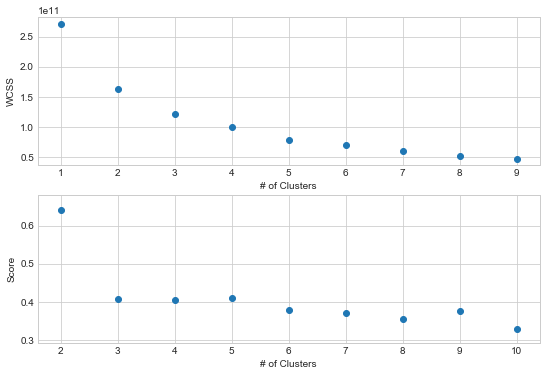

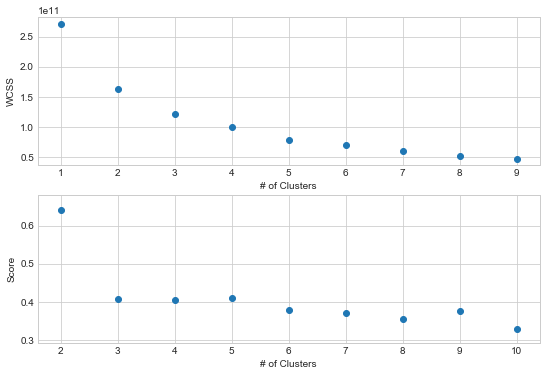

In [95]:
ClusterGetNumber(df.select_dtypes(["int64","float64"]))

In [96]:
df_numerics = df.select_dtypes(["int64","float64"])
df_PCA_cluster=clusterize(df_numerics, n_clusters=3)

C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [97]:
df["Cluster"]=df_PCA_cluster
df["ClusterColor"]=[int(x.split("C")[1]) for x in df.Cluster]

In [98]:
df.groupby("ClusterColor").agg("mean")

,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
ClusterColor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51860.844828,3457.655172,3225.620690,3226.879310,3742.000000,4479.844828,4757.206897,4130.862069,3640.982759,3549.189655,3543.482759,3324.413793,2824.482759,2382.103448,5576.120690,33.965517,87.629310,18651.517241,2320.810345,1362.862069,2271.500000,1918.344828,2357.137931,2898.879310,1919.413793,1983.396552,786.051724,833.120690,46223.568966,64115.120690
2,28156.000000,1753.823529,1636.107843,1636.156863,1870.745098,2099.333333,2303.333333,2167.568627,1976.264706,1944.333333,1976.245098,1920.598039,1698.039216,1501.539216,3671.911765,37.156863,49.556863,10511.705882,994.382353,609.019608,1033.215686,866.323529,1169.666667,1625.558824,1246.470588,1530.676471,710.362745,726.029412,60912.411765,79809.745098
3,81386.714286,4927.357143,4247.892857,4068.392857,4520.107143,5932.321429,7753.500000,7130.785714,6182.214286,5761.071429,5603.535714,5423.607143,4924.892857,4386.464286,10524.571429,36.821429,100.882143,33605.464286,2989.571429,1827.357143,3286.678571,2859.464286,3679.535714,5157.678571,3589.714286,4269.035714,2094.250000,3852.178571,65086.964286,98885.642857


In [104]:
px.parallel_categories(df,dimensions=["ClusterColor","borough",], color="ClusterColor", color_continuous_scale=px.colors.sequential.thermal)

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')